In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch  # To allow multiple legend tables

# Read Data & Clean Data
file_path = "Clean_Census_Data/income_vs_home_rent.csv"
df1 = pd.read_csv(file_path)
df1['County'] = df1['County'].str.replace(', Oregon', '', regex=False)
df1= df1.drop(columns=['Median Home Value'])

# Create relevant df columns
df1['Yearly Gross Rent'] = df1['Median Gross Rent'] * 12
df1['Rent to Income Ratio (%)'] = (df1['Yearly Gross Rent'] / df1['Median Household Income']) * 100
df1['Rent to Income Ratio (%)'] = df1['Rent to Income Ratio (%)'].round(1)

# Sorting by Median Household Income, Lowest to Highest
df1 = df1.sort_values(by=['Year', 'Median Household Income'], ascending=[True, True]).reset_index(drop=True)   
df1['YoY Income % Change'] = df1.groupby('County')['Median Household Income'].pct_change() * 100
df1['YoY Rent % Change'] = df1.groupby('County')['Yearly Gross Rent'].pct_change() * 100
df1[['YoY Income % Change', 'YoY Rent % Change']] = df1[['YoY Income % Change', 'YoY Rent % Change']].round(1).fillna(0)

# Unique Year & County
years = df1['Year'].unique()
counties = df1['County'].unique()

# Colors for Counties
income_colors = ['#4C72B0', '#55A868', '#C44E52']  # Softer tones for Income bars
rent_colors = ['#2A4B7C', '#2B8C4B', '#8B1A1A']    # Darker contrasting colors for Rent bars


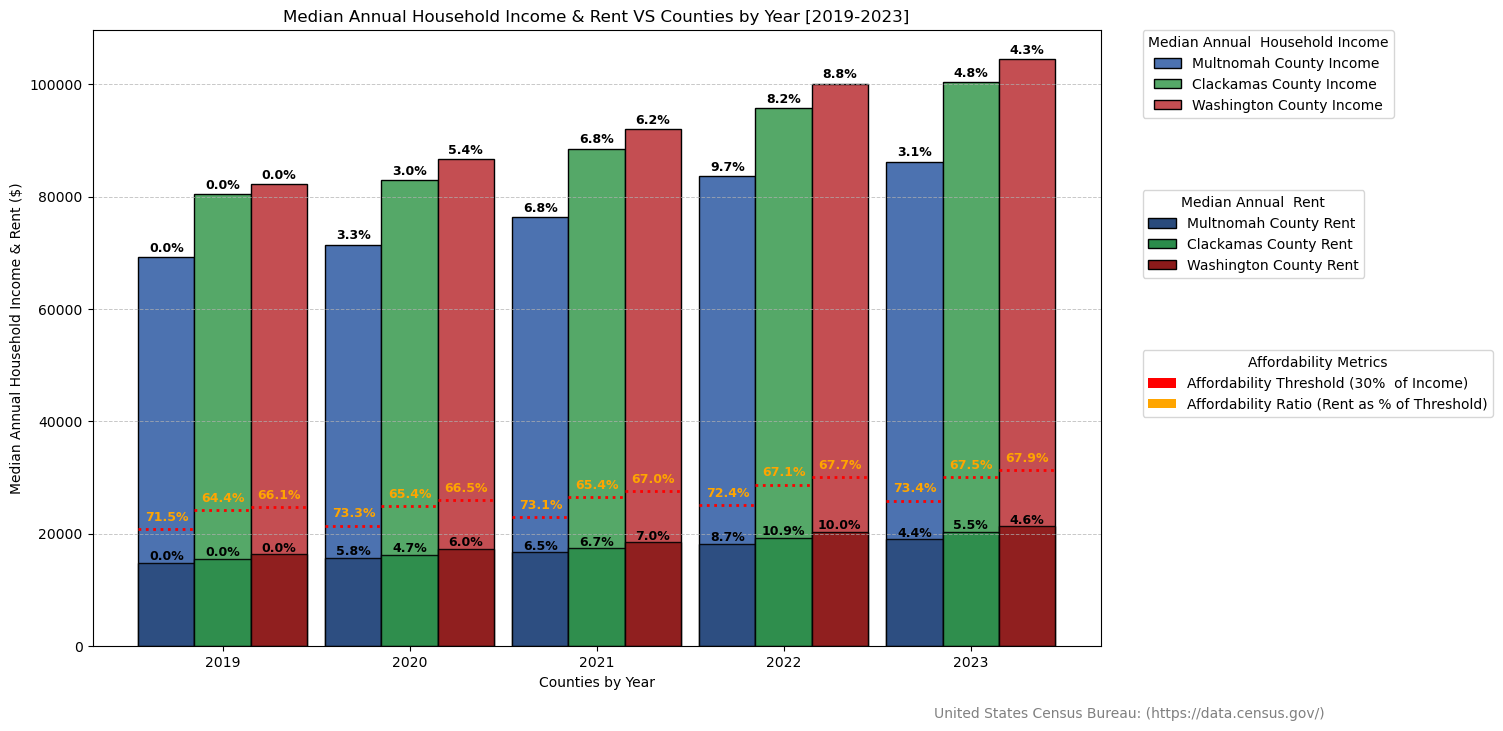

In [6]:

# Initialize Figure and Variables
x = np.arange(len(years))  # Positions for the groups
width = 0.30               # Width of each bar
plt.figure(figsize=(14, 8)) # Figure size

# Unique Legend Handles (Created Outside the Loop)
income_handles = [Patch(facecolor=color, edgecolor='black', label=f'{county} Income') 
                  for county, color in zip(counties, income_colors)]

rent_handles = [Patch(facecolor=color, edgecolor='black', label=f'{county} Rent') 
                for county, color in zip(counties, rent_colors)]

# Affordability Threshold and Affordability Ratio Legends
threshold_patch = Patch(facecolor='red', label='Affordability Threshold (30%  of Income)')
affordability_ratio_patch = Patch(facecolor='orange', label='Affordability Ratio (Rent as % of Threshold)')

# Plotting Data for Each County
for i, (county, income_color, rent_color) in enumerate(zip(counties, income_colors, rent_colors)):
    county_data = df1[df1['County'] == county]
    x_positions = x + i * width

    # Median Income and Rent Bars
    plt.bar(x_positions, county_data['Median Household Income'], width, 
            color=income_color, edgecolor='black')
    plt.bar(x_positions, county_data['Yearly Gross Rent'], width, 
            color=rent_color, alpha=0.9, edgecolor='black')

    # Adding Labels
    for j in range(len(county_data)):
        # YoY Income % Change
        plt.text(x_positions[j], county_data['Median Household Income'].values[j] + 1000,
                 f"{county_data['YoY Income % Change'].values[j]}%", ha='center', fontsize=9, fontweight='bold')

        # YoY Rent % Change
        plt.text(x_positions[j], county_data['Yearly Gross Rent'].values[j] + 500,
                 f"{county_data['YoY Rent % Change'].values[j]}%", ha='center', fontsize=9, fontweight='bold')

        # Affordability Threshold Line (30% of Income)
        threshold_value = county_data['Median Household Income'].values[j] * 0.3
        plt.hlines(y=threshold_value,
                   xmin=x_positions[j] - width / 2, xmax=x_positions[j] + width / 2,
                   colors='red', linestyles=':', linewidth=2)

        # Affordability Ratio Calculation (Rent as % of Threshold)
        affordability_ratio = (county_data['Yearly Gross Rent'].values[j] / threshold_value) * 100

        # Display Affordability Ratio Above the Threshold Line
        plt.text(x_positions[j], threshold_value + 1000,
                 f"{affordability_ratio:.1f}%",  # Format with 1 decimal place
                 ha='center', va='bottom', fontsize=9, fontweight='bold', color='orange')

# Labels and Titles
plt.xlabel('Counties by Year')
plt.ylabel('Median Annual Household Income & Rent ($)')
plt.title('Median Annual Household Income & Rent VS Counties by Year [2019-2023]')
plt.xticks(x + width, years)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adding Legends
fig = plt.gcf()

legend1 = fig.legend(handles=income_handles, title='Median Annual  Household Income', 
                     bbox_to_anchor=(0.85, 0.88), loc='upper left', borderaxespad=0)

legend2 = fig.legend(handles=rent_handles, title='Median Annual  Rent', 
                     bbox_to_anchor=(0.85, 0.68), loc='upper left', borderaxespad=0)

legend3 = fig.legend(handles=[threshold_patch, affordability_ratio_patch], 
                     title='Affordability Metrics', 
                     bbox_to_anchor=(0.85, 0.48), loc='upper left', borderaxespad=0)

# Adjust Layout
plt.subplots_adjust(left=0.10, right=0.82)  # Provide more room on the right

# Citation
plt.figtext(0.98, 0.02, "United States Census Bureau: (https://data.census.gov/)", fontsize=10, ha="right", color="gray")

# Save as a PNG
plt.savefig('income_vs_rent_trends.png', dpi=300, bbox_inches='tight')

# Display the Plot
plt.show()
